In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import stats
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)           # Default figure size
sns.set_theme(style='darkgrid', palette='viridis')


In [2]:
df=pd.read_csv(r"C:\Users\priya\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv")
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.describe()                 #km column can have outliers 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df.dtypes                  #only index col 2 needs to be encoded

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [5]:
df.isnull().sum()              #no missing values 

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

<Axes: >

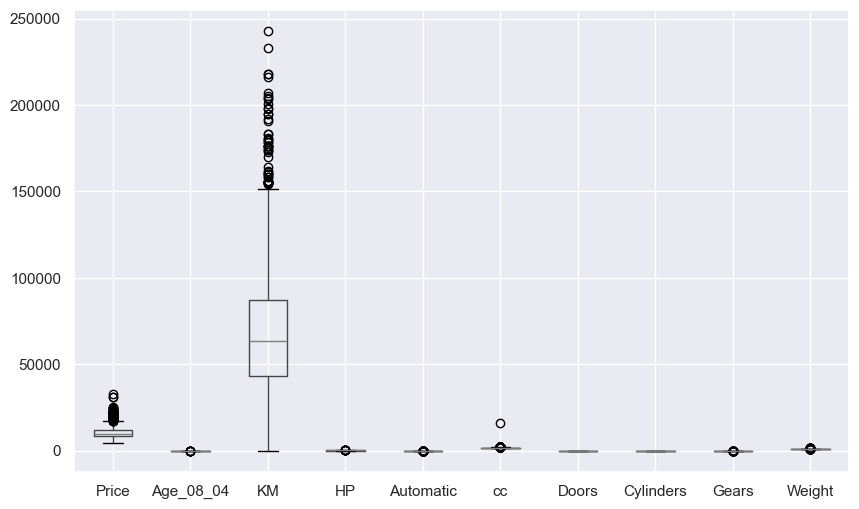

In [6]:
df.boxplot()            #here there are outliers in each column but 2nd column has the max no of outliers 

<Axes: xlabel='Fuel_Type', ylabel='count'>

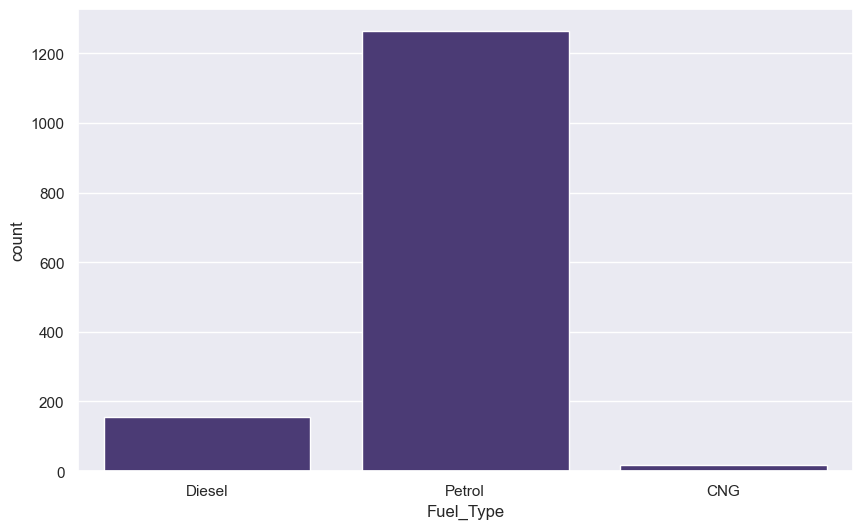

In [7]:
#df['Fuel_Type'].value_counts().plot(kind='bar')
sns.countplot(df,x=df['Fuel_Type'])

In [8]:
df['Fuel_Type'].isnull().sum()                          

0

In [9]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [10]:
df.drop('Fuel_Type',axis=1)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [11]:
outlier_detection(df,df.drop('Fuel_Type',axis=1).columns)

In [12]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,Petrol,86.0,0.0,1300.0,3.0,4.0,5.0,1025.0
1432,10845.0,72.0,19000.0,Petrol,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0
1433,8500.0,71.0,17016.0,Petrol,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0
1434,7250.0,70.0,16916.0,Petrol,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0


<Axes: >

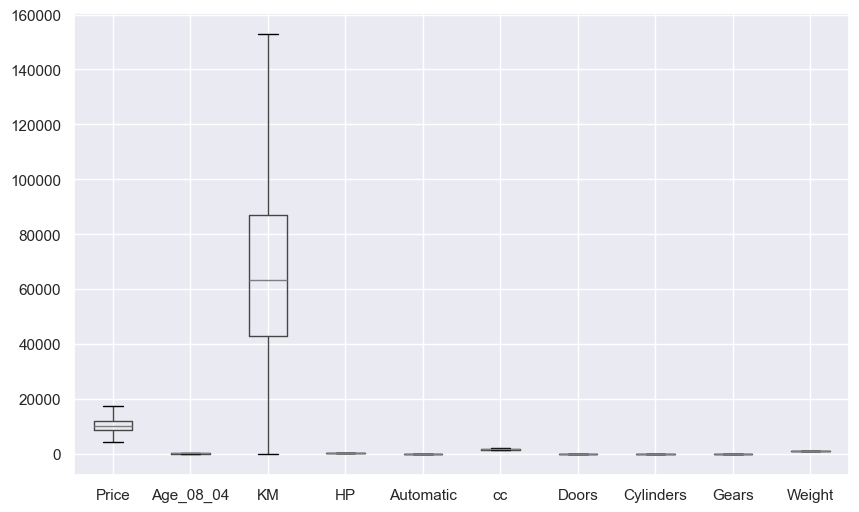

In [13]:
df.boxplot()

In [14]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.0,1436.000000,1436.000000,1436.0,1436.0,1436.000000
mean,10500.633008,55.958914,67604.873172,101.10376,0.0,1558.565460,4.033426,4.0,5.0,1068.579387
std,2981.813672,18.566512,34738.595454,13.14745,0.0,168.970222,0.952677,0.0,0.0,37.774625
min,4350.000000,5.000000,1.000000,69.00000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.00000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63389.500000,110.00000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87020.750000,110.00000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153051.875000,140.00000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


In [15]:
df.corr(numeric_only=True)             # #to check the corelation 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.895728,-0.608832,0.255640,NaN,0.132106,0.184211,NaN,NaN,0.509536
Age_08_04,-0.895728,1.000000,0.531839,-0.131284,NaN,-0.139771,-0.148137,NaN,NaN,-0.478225
KM,-0.608832,0.531839,1.000000,-0.330495,NaN,0.255855,-0.037677,NaN,NaN,-0.001489
HP,0.255640,-0.131284,-0.330495,1.000000,NaN,0.099605,0.120844,NaN,NaN,0.026578
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.132106,-0.139771,0.255855,0.099605,NaN,1.000000,0.139616,NaN,NaN,0.718655
Doors,0.184211,-0.148137,-0.037677,0.120844,NaN,0.139616,1.000000,NaN,NaN,0.381955
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.509536,-0.478225,-0.001489,0.026578,NaN,0.718655,0.381955,NaN,NaN,1.000000


In [16]:
df.dtypes

Price        float64
Age_08_04    float64
KM           float64
Fuel_Type     object
HP           float64
Automatic    float64
cc           float64
Doors        float64
Cylinders    float64
Gears        float64
Weight       float64
dtype: object

In [17]:
df.head(2)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5


In [18]:
df = pd.get_dummies(data=df,columns=['Fuel_Type'])

In [19]:
df=df.astype(int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,1900,3,4,5,1152,0,1,0
1,13750,23,72937,90,0,1900,3,4,5,1152,0,1,0
2,13950,24,41711,90,0,1900,3,4,5,1152,0,1,0
3,14950,26,48000,90,0,1900,3,4,5,1152,0,1,0
4,13750,30,38500,90,0,1900,3,4,5,1152,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [20]:
import statsmodels.formula.api as smf

In [21]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()

In [22]:
model.pvalues

Intercept            2.570776e-07
Age_08_04           1.983958e-288
KM                   2.667864e-33
HP                   7.213068e-05
Automatic            1.416004e-07
cc                   4.553295e-05
Doors                2.472869e-03
Cylinders            2.570776e-07
Gears                2.570776e-07
Weight               1.465368e-54
Fuel_Type_CNG        1.189894e-04
Fuel_Type_Diesel     2.837259e-01
Fuel_Type_Petrol     1.805301e-02
dtype: float64

In [23]:
model.params

Intercept          -1.775504e+02
Age_08_04          -1.071661e+02
KM                 -1.456894e-02
HP                  2.720947e+01
Automatic          -6.664249e-12
cc                 -2.468197e+00
Doors              -1.049146e+02
Cylinders          -7.102016e+02
Gears              -8.877520e+02
Weight              2.442507e+01
Fuel_Type_CNG      -8.604872e+02
Fuel_Type_Diesel    3.002844e+02
Fuel_Type_Petrol    3.826524e+02
dtype: float64

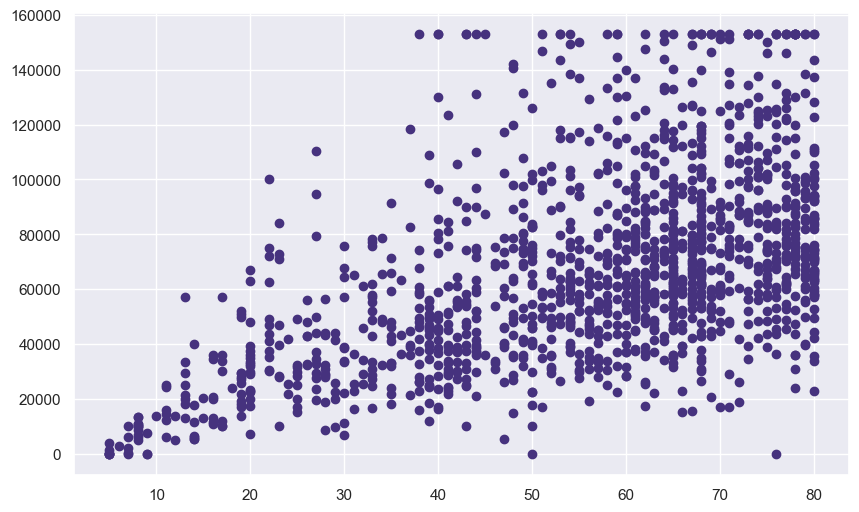

In [24]:
plt.scatter(x=df['Age_08_04'],y=df['KM'])

In [25]:
df.drop(columns= 'Automatic',inplace=True)
df

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,1900,3,4,5,1152,0,1,0
1,13750,23,72937,90,1900,3,4,5,1152,0,1,0
2,13950,24,41711,90,1900,3,4,5,1152,0,1,0
3,14950,26,48000,90,1900,3,4,5,1152,0,1,0
4,13750,30,38500,90,1900,3,4,5,1152,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,1300,3,4,5,1015,0,0,1


<Axes: >

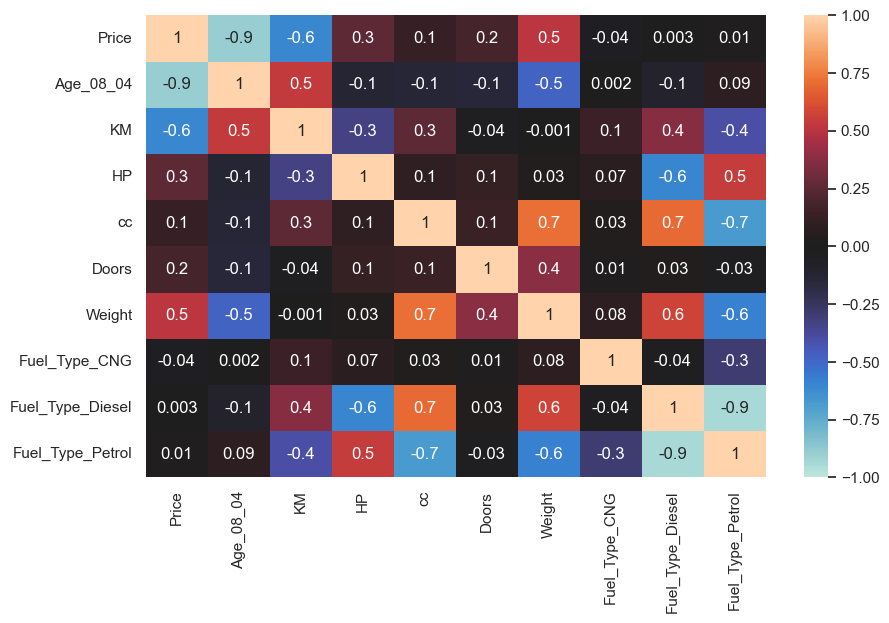

In [26]:
import seaborn as sns
df_int = df.drop(columns=['Cylinders','Gears'])
sns.heatmap(df_int.corr(),fmt='.1g',vmin=-1,vmax=1,center=0,annot=True)

# Model Building and Accuracy

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
x = df.drop('Price',axis=1)
y=df['Price']

In [29]:
x

,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,1900,3,4,5,1152,0,1,0
1,23,72937,90,1900,3,4,5,1152,0,1,0
2,24,41711,90,1900,3,4,5,1152,0,1,0
3,26,48000,90,1900,3,4,5,1152,0,1,0
4,30,38500,90,1900,3,4,5,1152,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,4,5,1025,0,0,1
1432,72,19000,86,1300,3,4,5,1015,0,0,1
1433,71,17016,86,1300,3,4,5,1015,0,0,1
1434,70,16916,86,1300,3,4,5,1015,0,0,1


In [30]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int32

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=67)

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
pred = model.predict(x_test)

In [35]:
mean_absolute_error(y_test,pred)

809.6189660750415

In [36]:
mean_absolute_error(y_test,pred)

809.6189660750415

In [37]:
mean_squared_error(y_test,pred)

1133819.9466282516

In [38]:
def MLR_CarPricePrediction(Data,target):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_error
    from sklearn.linear_model import LinearRegression
    import seaborn as sns 
    import matplotlib as plt
    Xtrain,xtest,Ytrain,Ytest=train_test_split(Data,target,test_size=0.2,random_state=89)
    model=LinearRegression()
    model.fit(Xtrain,Ytrain)
    pred = model.predict(xtest)
    print(pred)
    R2=r2_score(Ytest,pred)
    print(f'R2 Score for the MLR Model : {R2}')
    


In [39]:
x=df.iloc[:,1:]
y=df['Price']



In [40]:
MLR_CarPricePrediction(x,y)

[ 8366.79292244  8409.61707909  7751.42137728  7930.16666063
 13179.48087634 10111.22486491 13199.10073039 11084.4185058
 15168.03150034  6764.16706008  8616.29581675  8588.7538041
  9939.85807184 12681.22952815  8744.04052257 14433.11070726
  7285.45596462 16148.62809015  8163.65122782  8525.10590893
  8934.34153133 11999.94052671 11003.95542043  8615.57539784
  7056.67060314  9719.00295344 11004.54150358 17345.93066099
 11814.02370348  8519.53977198  8001.91909652  8011.46999138
  8929.65049069  7619.33692465  9324.45829518 10040.3835572
  7545.33326883 12810.50881747 10350.7210188   9107.04360441
  9617.8129674   9708.17100995  9874.34222553  7191.45270939
  8203.51898993 10278.24556446 12957.12509473 10000.38737378
  9637.37998209 12716.50225173  8136.2581792   9445.9679014
  7669.20006755 11581.83328505  8076.10543034  7302.05129792
 10400.54625358 12659.36130079  8725.84159896  9274.34593672
  9464.00494294  9623.21844553 15603.52507955 10272.67137411
  8531.38336308  7999.686473

In [41]:
# Applying Lasso and Ridge Methods 
from sklearn.linear_model import Ridge, Lasso


# Apply Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength (lambda)
ridge_model.fit(x_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(x_test)

# Evaluate the model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

# Apply Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength (lambda)
lasso_model.fit(x_train, y_train)

# Predict on test data
y_pred_lasso = lasso_model.predict(x_test)

# Evaluate the model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

# Step 4: Compare the coefficients
print("Ridge Coefficients:", ridge_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)

Ridge Regression MSE: 1134144.503321904
Lasso Regression MSE: 1133822.979975559
Ridge Coefficients: [-1.10442180e+02 -1.31876518e-02  2.81352665e+01 -2.58006884e+00
 -5.62572286e+01  0.00000000e+00  0.00000000e+00  2.24719922e+01
 -6.80411823e+02  3.98469644e+02  2.81942179e+02]
Lasso Coefficients: [-1.10401378e+02 -1.31413306e-02  2.89931410e+01 -2.65292108e+00
 -5.63029312e+01  0.00000000e+00  0.00000000e+00  2.24889140e+01
 -1.00620504e+03  1.65142667e+02 -0.00000000e+00]


# Interview Questions:

When we work with data in machine learning, not all features (or columns) have values on the same scale. For example, one column might represent income in thousands of dollars (e.g., 45,000), while another might represent age in years (e.g., 25). Such differences in scale can affect how machine learning algorithms perform, especially those that rely on distances (like K-Nearest Neighbors, SVMs, or gradient descent).

<b>1.What is Normalization & Standardization and how is it helpful? <\b>
- Normalization
Definition: Normalization is the process of rescaling data so that all features fall within a specific range, typically between 0 and 1.

- Standardization
Definition: Standardization is the process of transforming data to have a mean (average) of 0 and a standard deviation of 1.


<b>2.What techniques can be used to address multicollinearity in multiple linear regression? <\b>

Multicollinearity happens when two or more independent variables (or features) in a regression model are highly related to each other. It can cause problems because the model gets confused about which variable is driving the outcome, leading to unreliable estimates of coefficients and making it harder to interpret the results.

- Remove One of the Highly Correlated Variables
- Combine the Variables
- Use Principal Component Analysis(PCA)
- Variance Inflation Factor (VIF)
- Regularization Techniques (Ridge or Lasso Regression)